In [ ]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [ ]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [ ]:
cohort = "test1"

data_method = "test1_data"
eval_method = "test1_eval"

scene = "mid_gate"

courses = [
    "section1",
    "section2",
    "section3",
    ]   

roster = [
    "DRNet",
    "FHNet",
    "MENet"
    ]

dep1 = (cohort,courses[0],scene,eval_method)
dep2 = (cohort,courses[1],scene,eval_method)
dep3 = (cohort,courses[2],scene,eval_method)

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method,Nro_ds=20)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

Using existing observation data...

Output()

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

DRNet > commNet : Best checkpoint is commNet_ckpt000.

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

FHNet > commNet : Best checkpoint is commNet_ckpt100.

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

MENet > commNet : Best checkpoint is commNet_ckpt000.

======================================================================
Cohort : test1          Network: commNet
======================================================================
----------------------------------------------------------------------
Student: DRNet      | Epochs: 500   | Data Size: 20280.0/1950.0               
Time: 0h 12m 57s    | Train: 0.0043 | Test: 0.0096 | Eval TTE: 0.12
----------------------------------------------------------------------
Student: FHNet      | Epochs: 500   | Data Size: 20280.0/1950.0               
Time: 0h 13m 27s    | Train: 0.0013 | Test: 0.0034 | Eval TTE: 0.12
----------------------------------------------------------------------
Student: MENet      | Epochs: 500   | Data Size: 20638.0/2308.0               
Time: 0h 18m 17s    | Train: 0.0124 | Test: 0.0161 | Eval TTE: 0.18
======================================================================

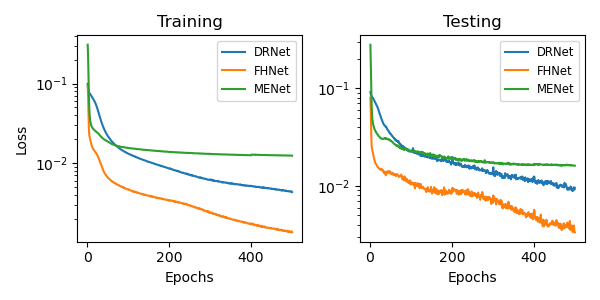

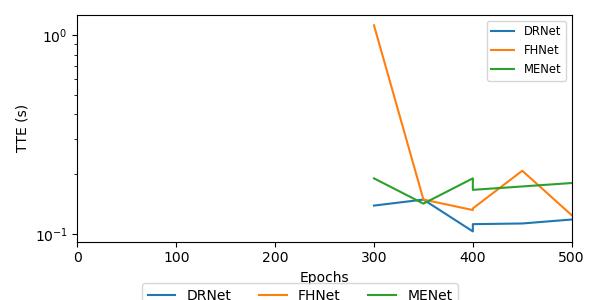

In [23]:
# Train the Policy
# tp.train_roster(cohort,roster,"commNet",100)
tp.train_roster(cohort,roster,"commNet",100,deployment=dep3,lim_sv=50)

pl.plot_losses(cohort,roster,"commNet",use_log=True)

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Plotting trajectories for expert...

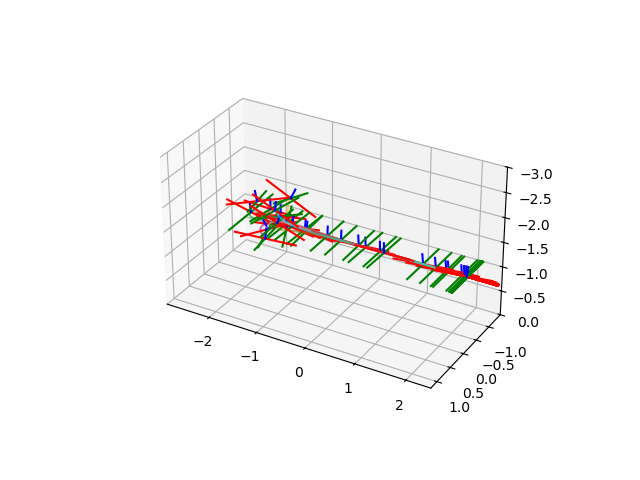

Plotting trajectories for DRNet...

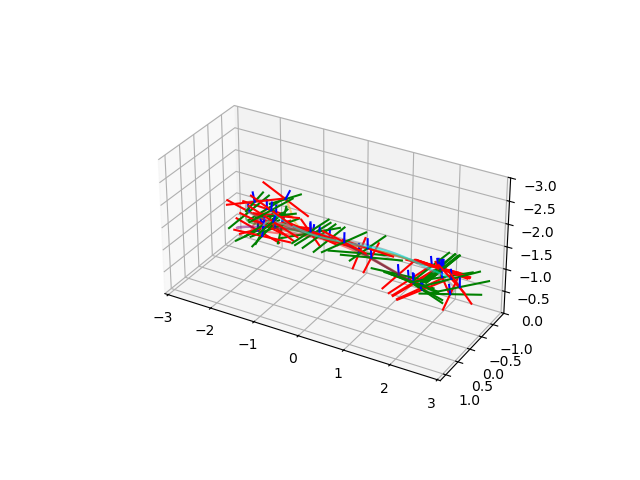

Plotting trajectories for FHNet...

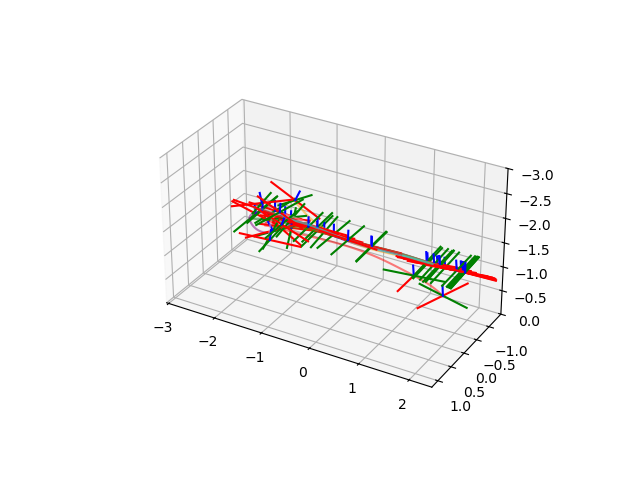

Plotting trajectories for MENet...

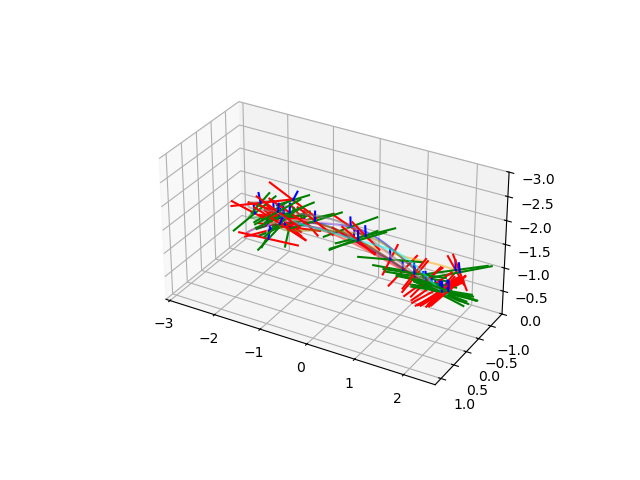

                     Deployment Summary                     
┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot  ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert │   0.13   │   0.09   │ 0.92 │ 185.13  │  87.13   │
│ DRNet  │   0.51   │   0.22   │ 0.34 │ 1130.38 │  174.33  │
│ FHNet  │   0.24   │   0.11   │ 0.77 │ 1069.59 │  174.32  │
│ MENet  │   0.69   │   0.35   │ 0.14 │ 830.79  │  164.39  │
└────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [25]:
# Simulate in FiGS
df.deploy_roster(cohort,dep1,roster,mode="visualize")
pl.plot_deployments(cohort,dep1[1],roster,plot_show=True)

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Plotting trajectories for expert...

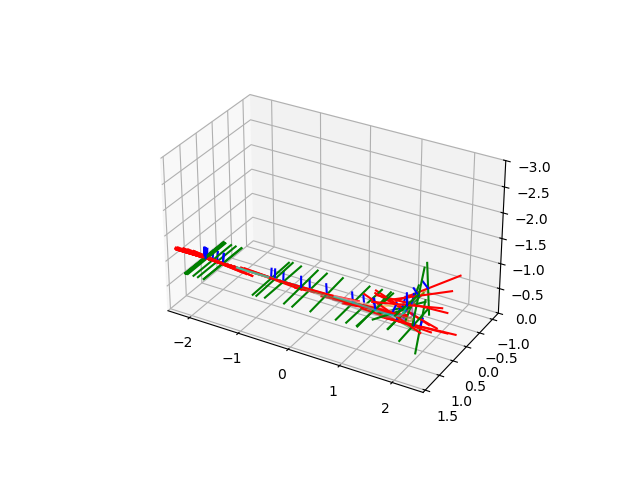

Plotting trajectories for DRNet...

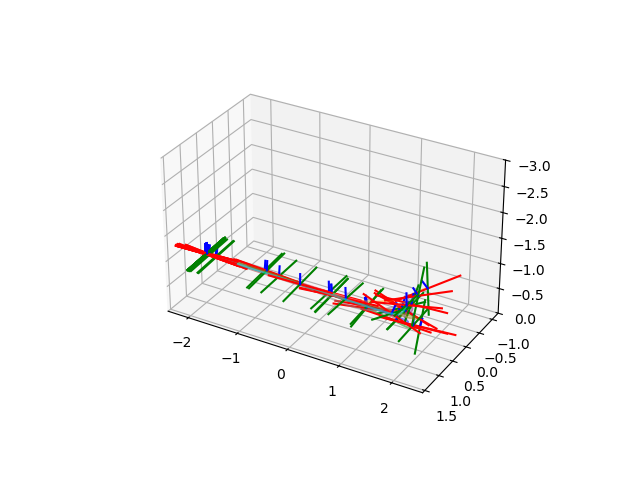

Plotting trajectories for FHNet...

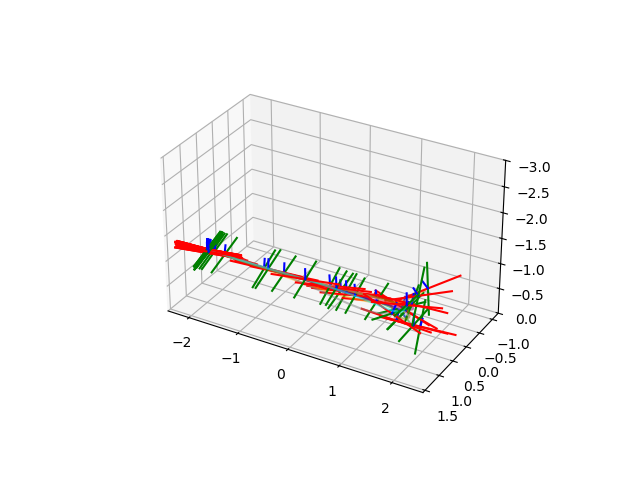

Plotting trajectories for MENet...

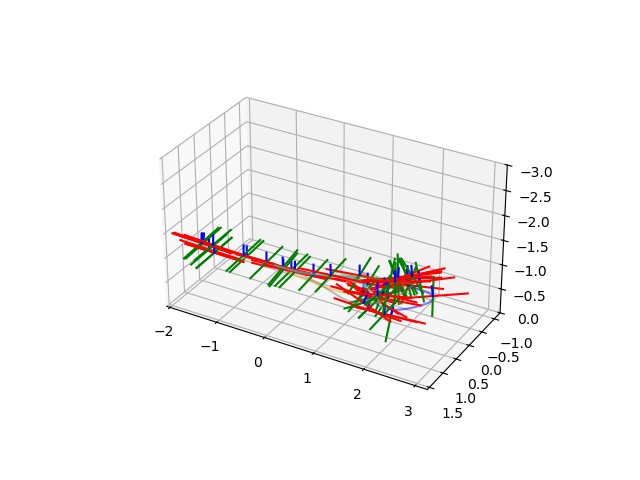

                     Deployment Summary                     
┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot  ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert │   0.12   │   0.10   │ 0.96 │ 187.93  │  104.11  │
│ DRNet  │   0.10   │   0.08   │ 0.95 │ 1141.52 │  178.28  │
│ FHNet  │   0.11   │   0.09   │ 0.96 │ 1086.67 │  178.10  │
│ MENet  │   0.34   │   0.17   │ 0.59 │ 804.95  │  165.90  │
└────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [26]:
df.deploy_roster(cohort,dep2,roster,mode="visualize")
pl.plot_deployments(cohort,dep2[1],roster,plot_show=True)

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Plotting trajectories for expert...

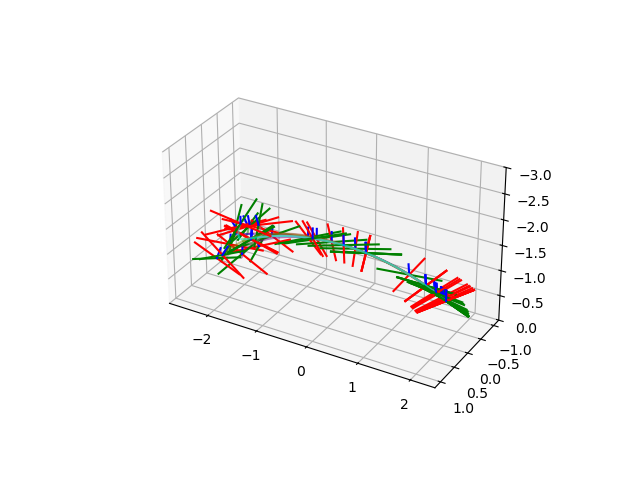

Plotting trajectories for DRNet...

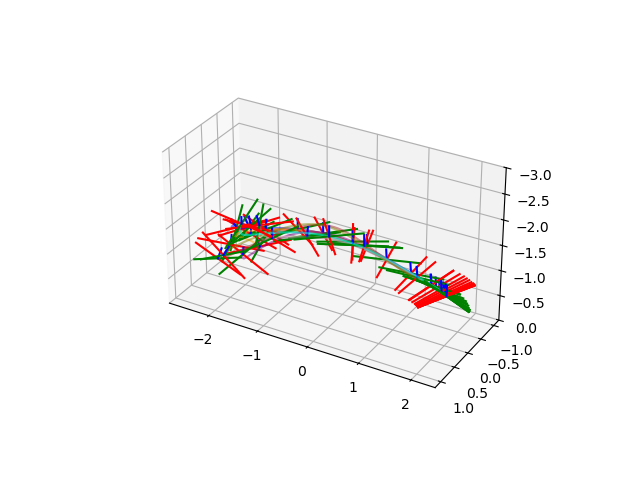

Plotting trajectories for FHNet...

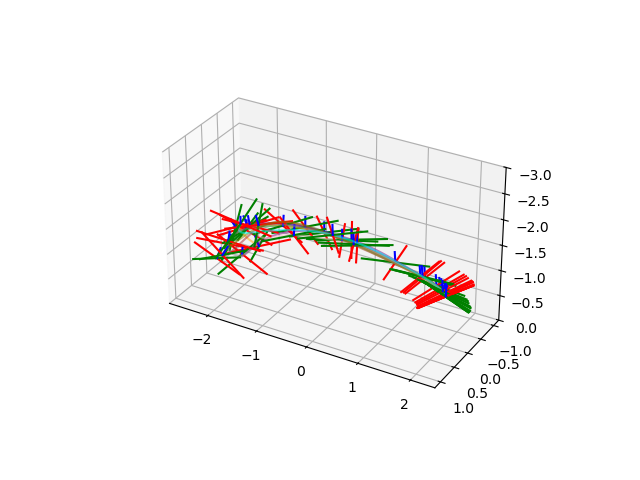

Plotting trajectories for MENet...

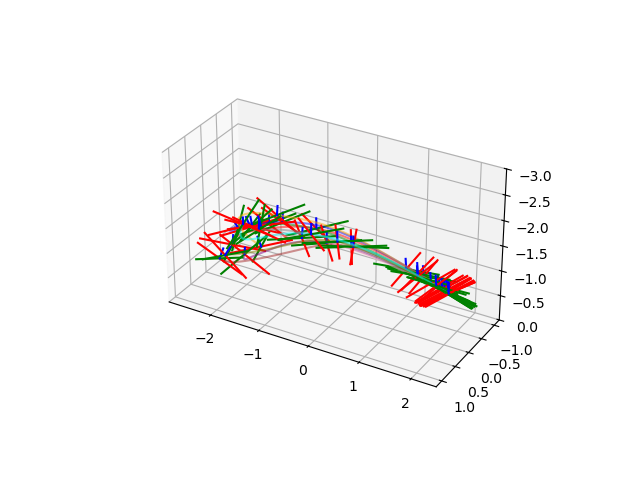

                     Deployment Summary                     
┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot  ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert │   0.12   │   0.10   │ 0.94 │ 189.36  │  67.80   │
│ DRNet  │   0.10   │   0.06   │ 0.92 │ 1219.80 │  182.92  │
│ FHNet  │   0.10   │   0.07   │ 0.92 │ 1138.65 │  177.16  │
│ MENet  │   0.16   │   0.12   │ 0.82 │ 841.55  │  165.03  │
└────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [27]:
df.deploy_roster(cohort,dep3,roster,mode="visualize")
pl.plot_deployments(cohort,dep3[1],roster,plot_show=True)